Nama : Yasmine Alifta

NIM : 2311110044

Kelas : SD-04-01

- Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data!
- Hasil dari EDA dan pre-processing dapat diinterpretasikan
- Lakukan pemodelan menggunakan algoritma klasifikasi KNN, Decision Tree dan Naive Bayes
- Gunakan matriks evaluasi accuracy score, recall dan precision. buatlah kesimpulan algoritma mana yang paling baik.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv('/content/Training.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


dataset memiliki 2460 baris data dan 9 kolom.

In [4]:
# mengecek missing value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


dataset bersih, tidak memiliki missing value

In [5]:
# statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# mengecek jumlah data duplikat
df.duplicated().sum()

2000

terdapat duplikasi 2000 data

In [7]:
# mengecek duplikasi data tiap baris
duplicates = df.value_counts(dropna=False).reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]
duplicates

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,count
0,7,196,90,0,0,39.8,0.451,41,1,14
1,4,120,68,0,0,29.6,0.709,34,0,13
2,2,102,86,36,120,45.5,0.127,23,1,12
3,6,105,70,32,68,30.8,0.122,37,0,12
4,4,184,78,39,277,37.0,0.264,31,1,12
...,...,...,...,...,...,...,...,...,...,...
451,2,92,62,28,0,31.6,0.130,24,0,2
452,3,99,80,11,64,19.3,0.284,30,0,2
453,7,178,84,0,0,39.9,0.331,41,1,2
454,3,113,44,13,0,22.4,0.140,22,0,2


karena jumlah data duplikasi ditiap baris nya berbeda-beda maka tidak perlu dilakukan penghapusan data duplikasi.

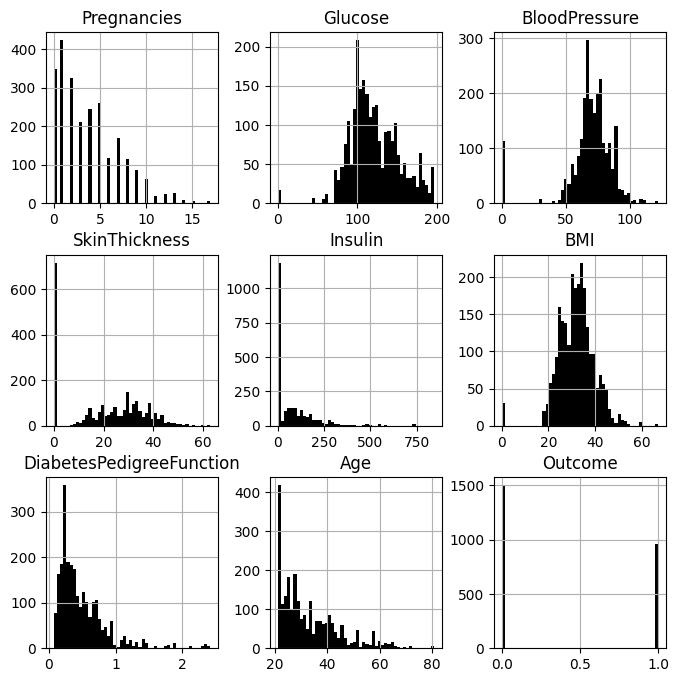

In [8]:
# melihat distribusi data
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=50, figsize=(8,8), color='black');

distribusi data tidak normal dan masih terdapat banyak outlier

In [9]:
# mengecek outlier
def outlier (data):
  columns = df.select_dtypes(include=['int', 'float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
    outlier_counts[x] = len(outliers)

  return outlier_counts

outlier_counts = outlier(df)
print(f'jumlah data outlier: {outlier_counts}')

jumlah data outlier: {'Pregnancies': 21, 'Glucose': 17, 'BloodPressure': 140, 'SkinThickness': 0, 'Insulin': 97, 'BMI': 56, 'DiabetesPedigreeFunction': 103, 'Age': 63, 'Outcome': 0}


- pregnancies memiliki 21 outlier
- glucose memiliki 17 outlier
- bloodpressure memiliki 140 outlier
- skinthickness tidak memiliki outlier
- insulin memiliki 97 outlier
- BMI memiliki 56 outlier
- DiabetesPedigreeFunction memiliki 103 outlier
- Age memiliki 63 outlier
- Outcome tidak memiliki outlier

In [10]:
# menghapus otlier
def remove_outlier(data):
  columns = data.select_dtypes(include=['int', 'float']).columns
  cleaned_data = data.copy() # membuat salinan dataframe untuk menghindari perubahan pada data asli
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
  return cleaned_data

df_cleaned = remove_outlier(df)

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2027 non-null   int64  
 1   Glucose                   2027 non-null   int64  
 2   BloodPressure             2027 non-null   int64  
 3   SkinThickness             2027 non-null   int64  
 4   Insulin                   2027 non-null   int64  
 5   BMI                       2027 non-null   float64
 6   DiabetesPedigreeFunction  2027 non-null   float64
 7   Age                       2027 non-null   int64  
 8   Outcome                   2027 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 158.4 KB


dataset setelah mengalami penghapusan outlier memiliki 2027 baris data yang mana mengalami pengurangan.

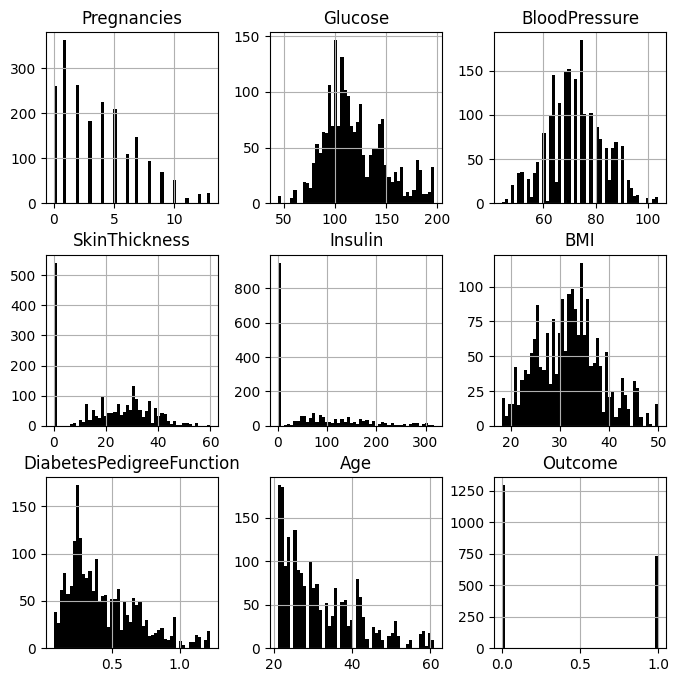

In [12]:
df_cleaned.hist(bins=50, figsize=(8,8), color='black');

distribusi sudah terlihat cukup normal dan nilai ekstrem nya pun menurun seperti pada glucose yang tadinya nilai ekstrem berada diatas 200 sudah turun menjadi dibawah 150.

<Axes: title={'center': 'Correlation Between Variables'}>

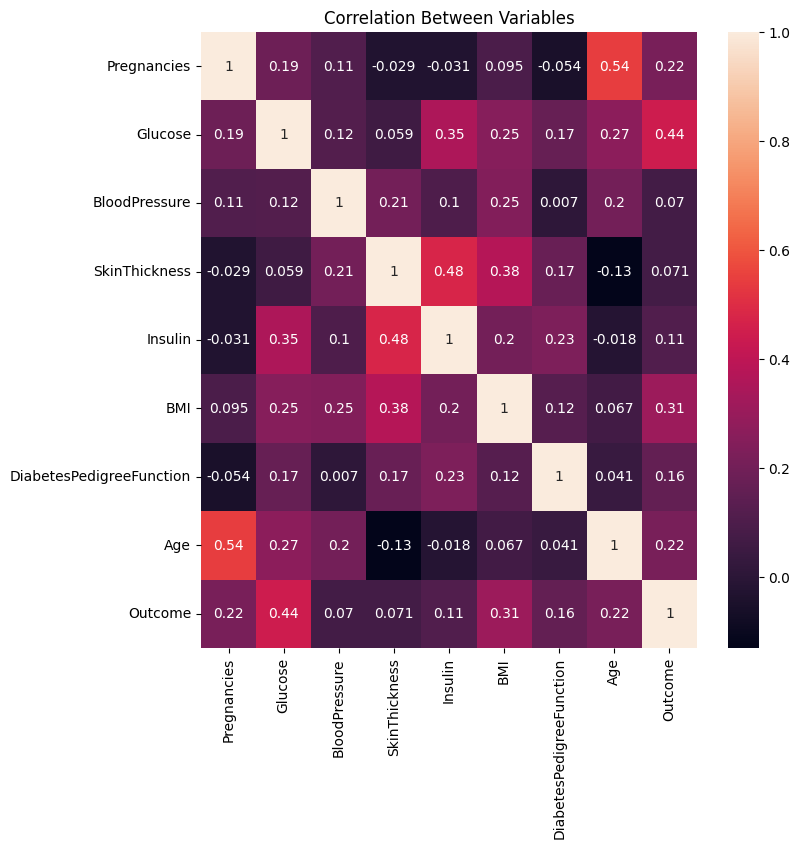

In [13]:
plt.figure(figsize=(8,8))
plt.title('Correlation Between Variables')
sns.heatmap(data = df.corr(), annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

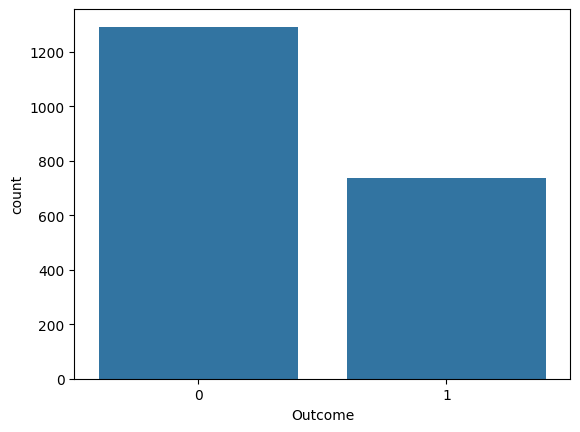

In [14]:
sns.countplot(x='Outcome', data=df_cleaned)

# **KNN**

In [15]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(80.0, 20.0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

[[299   6]
 [  1 186]]
0.9857723577235772
0.9946524064171123
0.96875


- accuracy score

98,57% prediksi model sudah tepat dan hampir sempurna

- recall score

99,46% model berhasil mengidentifikasi dengan benar

- precision score

96,87% prediksi positif oleh model adalah benar  

secara keseluruhan model KNN terlihat sangat baik

<Axes: >

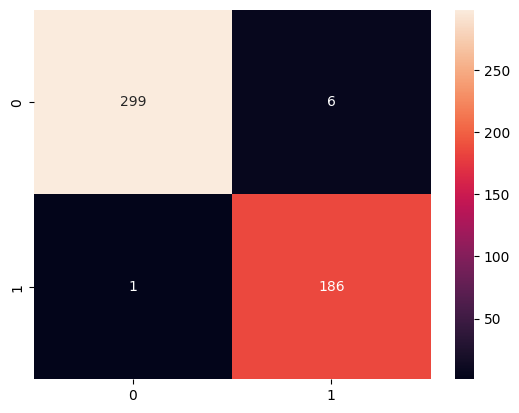

In [20]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

- True Negative (TN) = 299: Jumlah prediksi negatif yang benar
- False Positive (FP) = 6: Jumlah prediksi positif yang salah
- False Negative (FN) = 1: Jumlah prediksi negatif yang salah
- True Positive (TP) = 186: Jumlah prediksi positif yang benar

# **Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [22]:
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[305   0]
 [  0 187]]
1.0
1.0
1.0


- accuracy score

100% model berhasil memprediksi dengan sempurna

- recall score

100% model berhasil mengidentifikasi dengan sempurna tanpa ada yang terlewat

- precision score

100% prediksi positif oleh model adalah benar

secara keseluruhan model Decision Tree memiliki kemampuan paling baik bahkan sempurna.

<Axes: >

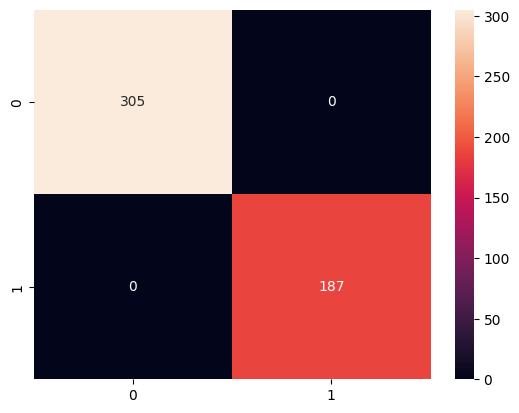

In [23]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')

- True Negative (TN) = 305: Jumlah prediksi negatif yang benar
- False Positive (FP) = 0: Tidak ada prediksi positif yang salah
- False Negative (FN) = 0: Tidak ada prediksi negatif yang salah
- True Positive (TP) = 187: Jumlah prediksi positif yang benar

# **Naive Bayes**

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [25]:
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(recall_score(y_test, y_pred_nb))
print(precision_score(y_test, y_pred_nb))

[[245  60]
 [ 79 108]]
0.717479674796748
0.5775401069518716
0.6428571428571429


- accuracy score

71,74% model berhasil memprediksi dengan benar

- recall score

57,75% model berhasil mengidentifikasi kasus positif

- precision score

64,28% prediksi positif oleh model adalah benar positif

secara keseluruhan model Naive Bayes memiliki kemampuan cukup baik.

<Axes: >

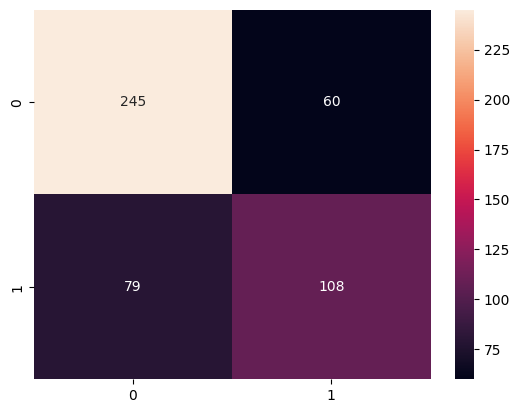

In [26]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')

- True Negative (TN) = 245: Jumlah prediksi negatif yang benar
- False Positive (FP) = 60: Tidak ada prediksi positif yang salah
- False Negative (FN) = 79: Tidak ada prediksi negatif yang salah
- True Positive (TP) = 108: Jumlah prediksi positif yang benar

### Dari 3 model yang digunakan dan berdasarkan dari accuracy score, recall, dan precision tiap model, model yang paling bagus adalah *DECISION TREE* karena memperoleh skor sempurna di setiap metrik nya.